# Temperature Forecast Project using ML

### According to problem statement there are two target variables which are : Next_Tmax and Next_Tmin. So we need to make two models in which while making 1st model Next_Tmax is a target variable and Next_Tmin will be consider as an independent variable. 

### similarly while making 2nd model Next_Tmin is a target variable and Next_Tmax will be consider as an independent variable. 

# MODEL 1: Next_Tmax is a target variable

## Importing Libreries

In [364]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset

In [365]:
#Import the dataset

df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns

In [366]:
df.shape

(7752, 25)

There are 7752 Rows and 25 Columns in dataset

## Detailed description

In [367]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

## Datatypes of all columns

In [368]:
#check the data types of all the columns
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

We have object(string) datatype in ----> Date 

rest all are floating data type

## Checking is there any null value in dataset

In [369]:
#check is there any null value present in any column

df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

## Visualizing of null value

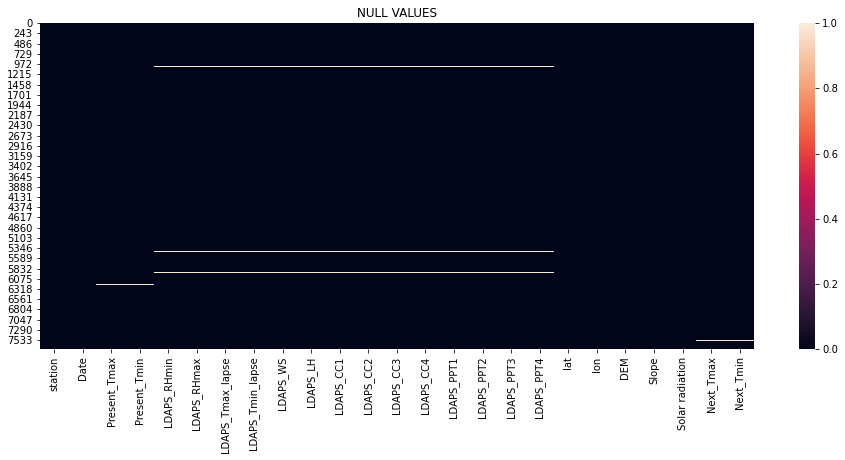

In [370]:
plt.figure(figsize=[16,6])
sn.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

There are so many missing values in whole dataset. We need to treat that and fill null values. 

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


We can see the complete information about data frame

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

In [372]:
fe = df[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]

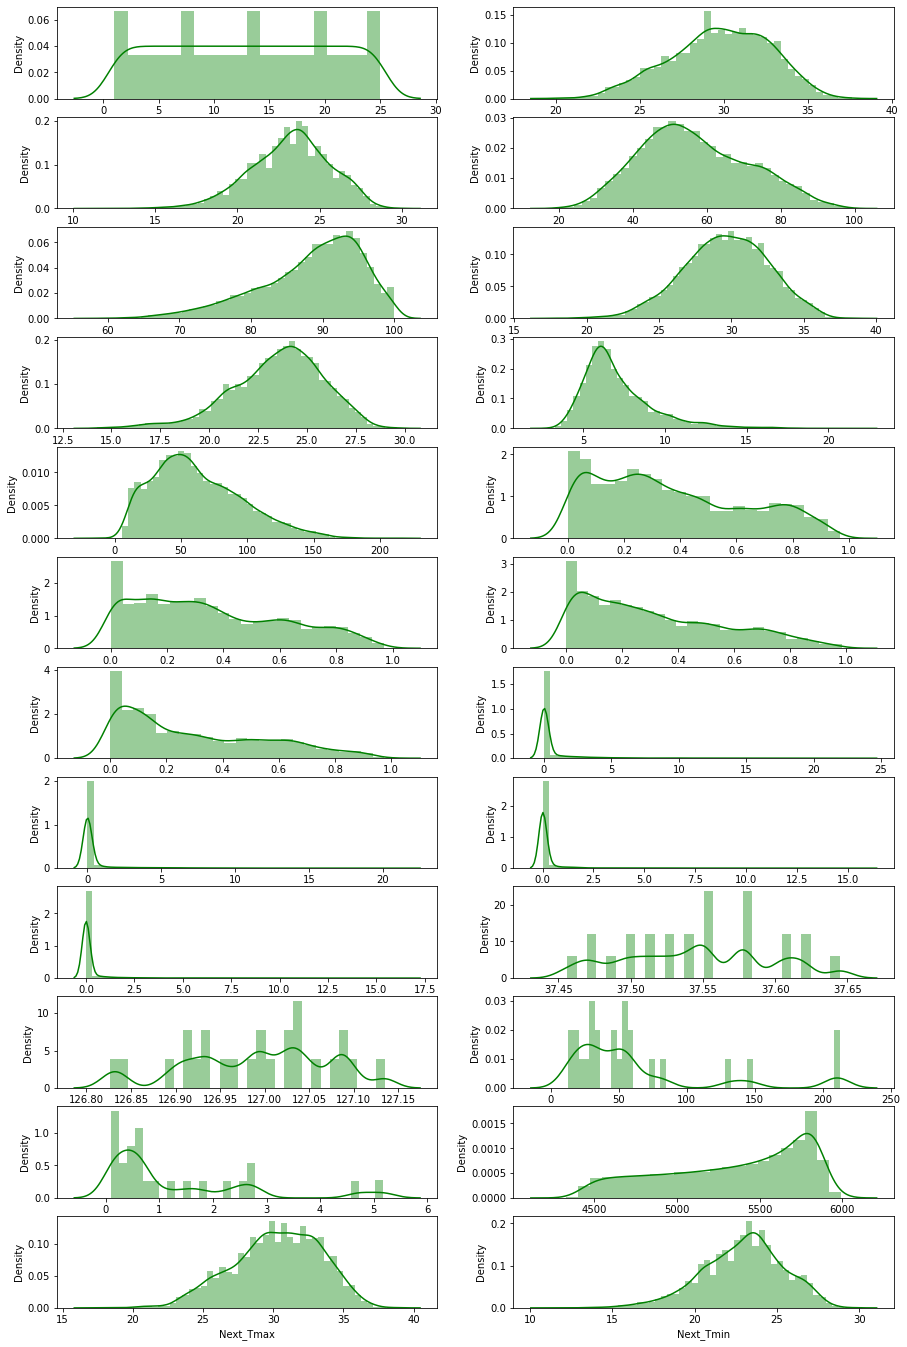

In [373]:
#Relationship Visualizing

plt.figure(figsize = (15,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 30: # as we see there are twenty five columns in the data
        ax = plt.subplot(15,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

##### As shown in above distplot almost every variables is having skewness in it 

### Analysis through boxplot

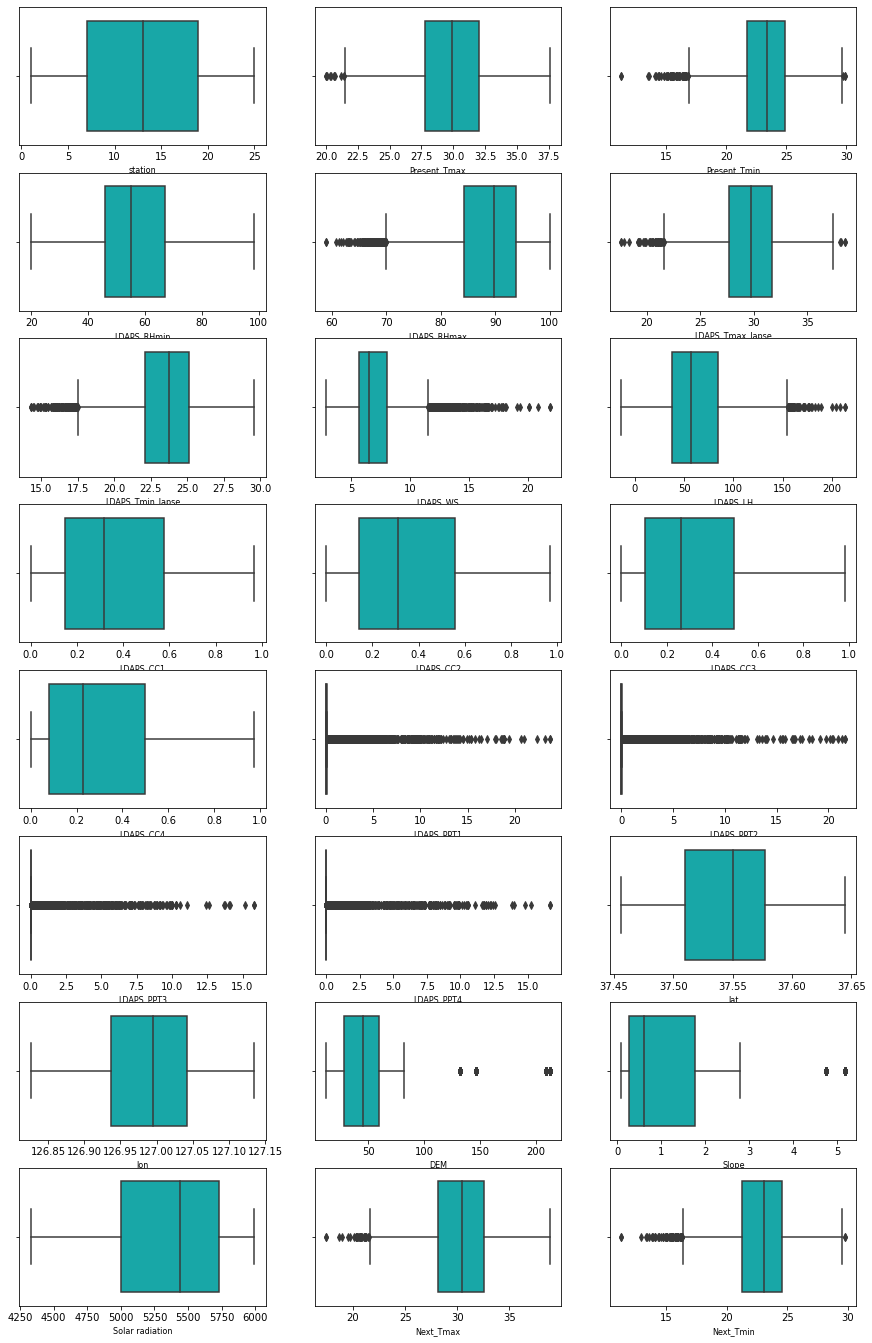

In [374]:
#Relationship Visualizing

plt.figure(figsize = (15,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 30: # as we see there are twenty five columns in the data
        ax = plt.subplot(10,3,plotnumber)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=8)
        
    plotnumber += 1
plt.show()

##### so many columns contains outliers in it( 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope')

## Bi variate analysis
Bi variate analysis is works with two variables.

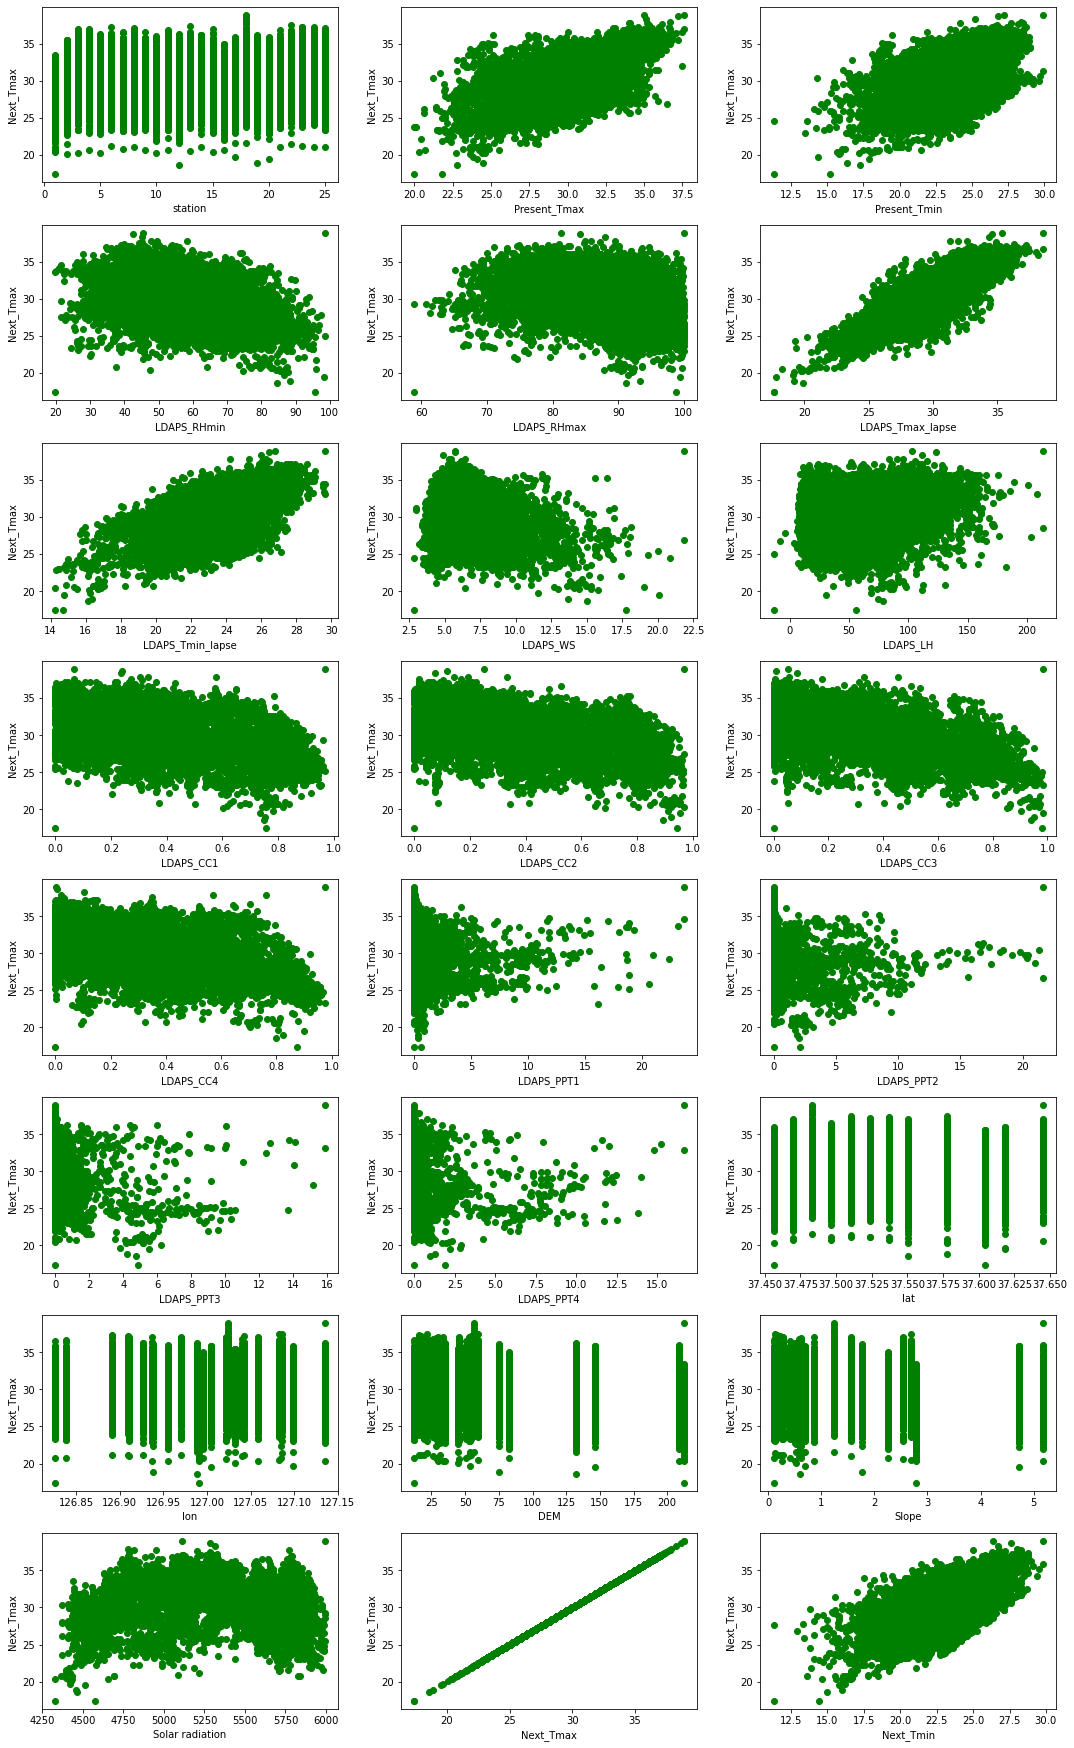

In [375]:
#Relationship Visualizing

plt.figure(figsize = (15,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 30:
        ax = plt.subplot(10,3,plotnumber)
        plt.scatter(fe[column],fe['Next_Tmax'], color='g')
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Next_Tmax', fontsize=10)
    plotnumber += 1
plt.tight_layout()

There are some variables are having some amount of linear relationship with target variable
and some are having  non linear relationship with target variable.
some are very poorly correlated with target variable

As we see in the plot some outliers are also present in it.

## Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

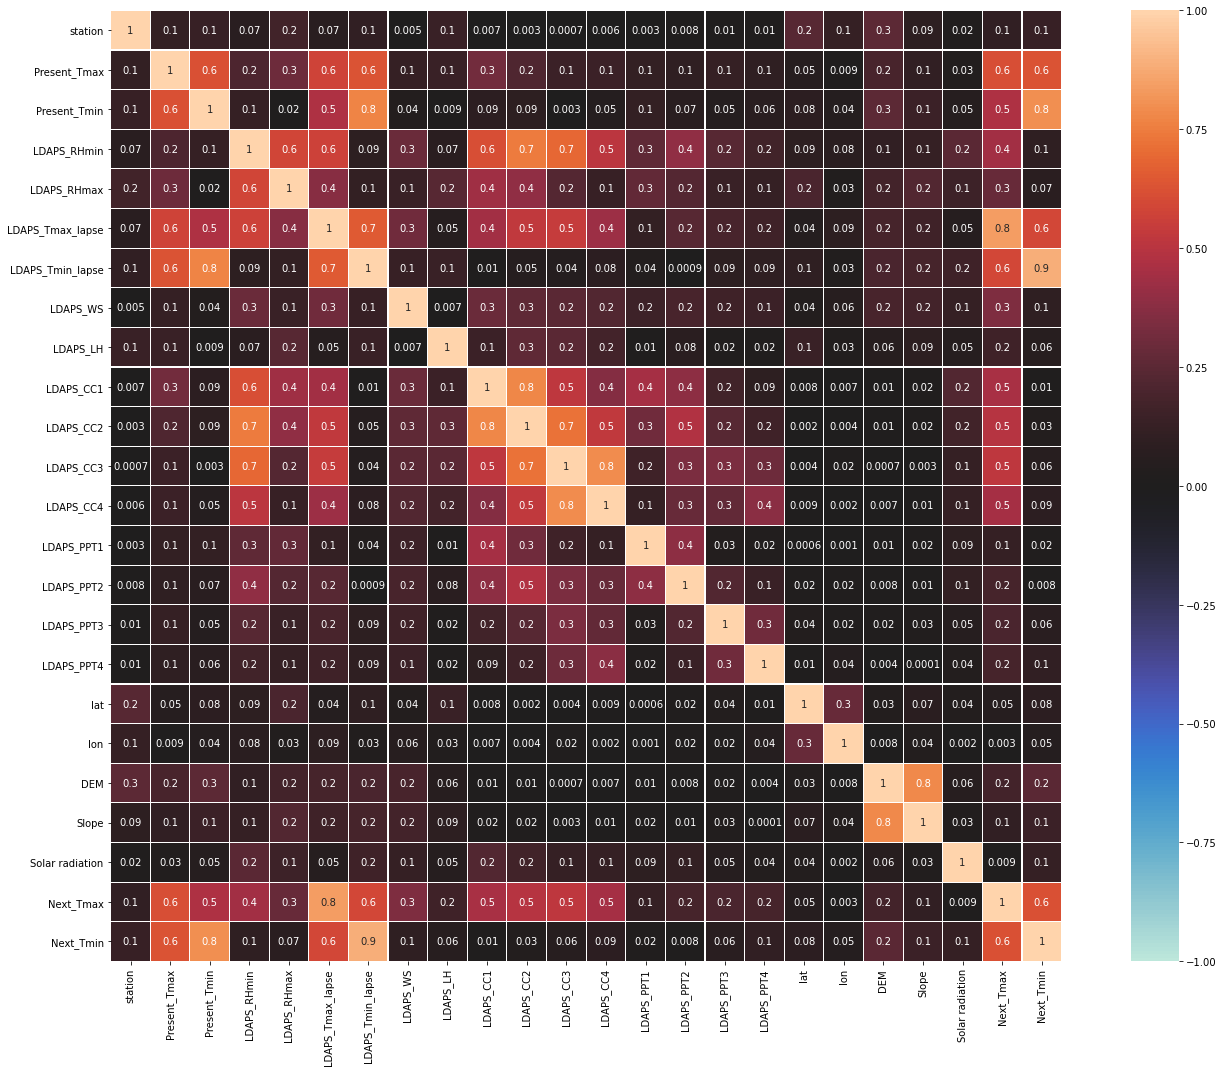

In [376]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in plot lon and Solar radiation is poorly correlated with target variable and other variables are having some good amount of relationship with target variable.

## Find out which columns are positively and negatively correlated with each other

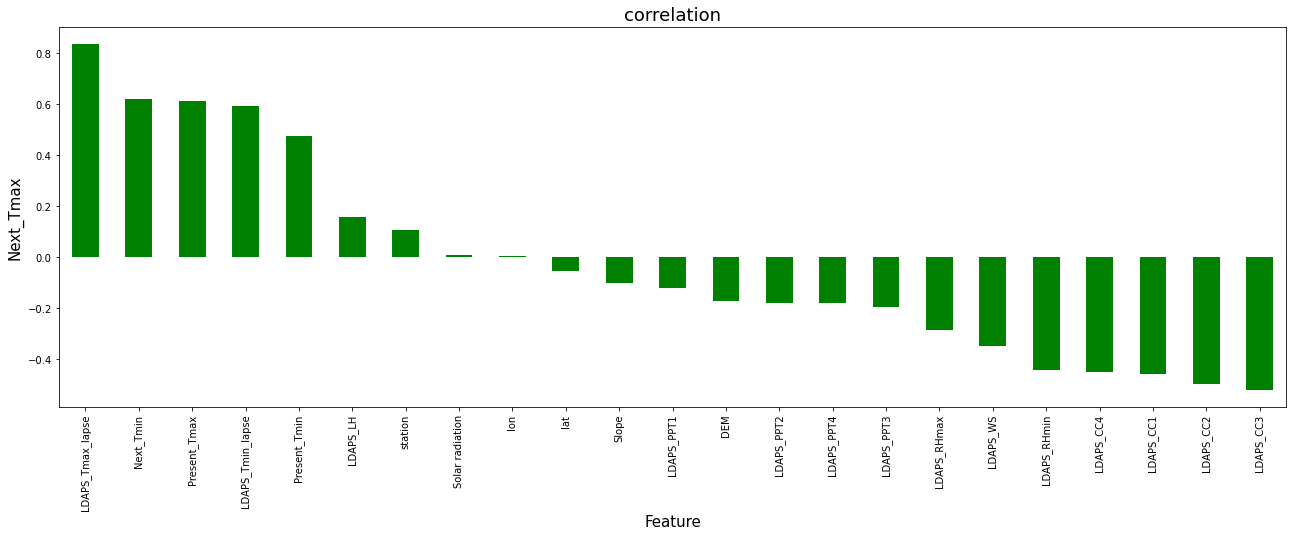

In [377]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending = False).drop(['Next_Tmax']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Next_Tmax', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

As shown in plot all features are positively and negatively correlate with target variable. lon is poorly correlated with target variable

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

## Extract Date column

In [378]:
df["Date"]=pd.to_datetime(df["Date"])

In [379]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

we can see the data type of date column change from oject to datetime. Now, we can axtract it.

In [380]:
df["Year"] = df["Date"].dt.year

In [381]:
df["Month"] = df["Date"].dt.month

In [382]:
df["Day"] = df["Date"].dt.day

In [383]:
#drop Date column
df=df.drop(['Date'], axis=1)

In [384]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.0,8.0,30.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.0,8.0,30.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


## Handling missing values

In [385]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 2
Month                2
Day                  2
dtype: int64

#### 1.station

In [386]:
# Check unique values of station column
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [387]:
df['station']= df['station'].fillna(df['station'].mean())

#### 2.Present_Tmax

In [388]:
# Check unique values of Present_Tmax column
df['Present_Tmax']= df['Present_Tmax'].fillna(df['Present_Tmax'].mean())

#### 3. Present_Tmin

In [389]:
# Check unique values of Present_Tmin column
df['Present_Tmin']= df['Present_Tmin'].fillna(df['Present_Tmin'].mean())

#### 4. LDAPS_RHmin

In [390]:
# Check unique values of LDAPS_RHmin column
df['LDAPS_RHmin'].unique()

array([58.25568771, 52.26339722, 48.69047928, ..., 26.74131012,
       24.04063416, 22.93301392])

In [391]:
# Check unique values of LDAPS_RHmin column
df['LDAPS_RHmin']= df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())

#### 5. LDAPS_RHmax

In [392]:
# Check unique values of LDAPS_RHmax column
df['LDAPS_RHmax']= df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())

#### 6.LDAPS_Tmax_lapse

In [393]:
# Check unique values of LDAPS_RHmin column
df['LDAPS_Tmax_lapse'].unique()

array([28.07410146, 29.85068856, 30.09129171, ..., 26.35208148,
       27.01019337, 27.93951572])

In [394]:
# Check unique values of LDAPS_Tmax_lapse column
df['LDAPS_Tmax_lapse']= df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())

#### 7.LDAPS_Tmin_lapse

In [395]:
# Check unique values of LDAPS_Tmin_lapse column
df['LDAPS_Tmin_lapse']= df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())

#### 8. LDAPS_WS

In [396]:
# Check unique values of LDAPS_WS column
df['LDAPS_WS'].unique()

array([6.81888697, 5.69188993, 6.13822368, ..., 6.14891751, 6.542819  ,
       7.28926362])

In [397]:
# Check unique values of LDAPS_WS column
df['LDAPS_WS']= df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())

#### 9. LDAPS_LH

In [398]:
# Check unique values of LDAPS_LH column
df['LDAPS_LH']= df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())

#### 10. LDAPS_CC1

In [399]:
# Check unique values of LDAPS_CC1 column
df['LDAPS_CC1'].unique()

array([0.23394747, 0.2255082 , 0.20934366, ..., 0.03003418, 0.03587383,
       0.04895354])

In [400]:
df['LDAPS_CC1']= df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())

#### 11. LDAPS_CC2

In [401]:
df['LDAPS_CC2']= df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())

#### 12. LDAPS_CC3

In [402]:
df['LDAPS_CC3']= df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())

#### 13.LDAPS_CC4

In [403]:
df['LDAPS_CC4']= df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())

#### 14.LDAPS_PPT1

In [404]:
# Check unique values of LDAPS_PPT1 column
df['LDAPS_PPT1'].unique()

array([0.        , 0.80422247, 0.46474446, ..., 3.45615864, 2.20858192,
       2.04050223])

In [405]:
df['LDAPS_PPT1']= df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())

#### 15.LDAPS_PPT2

In [406]:
df['LDAPS_PPT2']= df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())

#### 16.LDAPS_PPT3

In [407]:
df['LDAPS_PPT3']= df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())

#### 17. LDAPS_PPT4

In [408]:
df['LDAPS_PPT4']= df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

#### 18.Next_Tmax

In [409]:
# Check unique values of Next_Tmax column
df['Next_Tmax'].unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5,  nan, 32.8, 33.7, 33.2,
       32.9, 34.1, 34.9, 35.3, 34.6, 35. , 33.9, 34.7, 36.6, 34.4, 35.8,
       35.2, 33.8, 35.6, 35.1, 34.2, 36. , 35.5, 35.4, 21.6, 23.5, 24.4,
       24. , 35.9, 36.1, 22.5, 22.8, 36.2, 21.1, 23.3, 22. , 22.7, 20.9,
       22.2, 22.1, 37. , 36.9, 22.9, 35.7, 37.1, 22

In [410]:
df['Next_Tmax']= df['Next_Tmax'].fillna(df['Next_Tmax'].mean())

#### 19. Next_Tmin

In [411]:
# Check unique values of Next_Tmin column
df['Next_Tmin']= df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

#### 20.Year

In [412]:
# Check unique values of Next_Tmax column
df['Year'].unique()

array([2013., 2014., 2015., 2016., 2017.,   nan])

In [413]:
df['Year']= df['Year'].fillna(df['Year'].mean())

#### 21.Month

In [414]:
# Check unique values of Month column
df['Month'].unique()

array([ 6.,  1.,  2.,  3.,  4.,  5.,  7.,  8.,  9., 10., 11., 12., nan])

In [415]:
df['Month']= df['Month'].fillna(df['Month'].mode()[0])

#### 22. Day

In [416]:
# Check unique values of Day column
df['Day'].unique()

array([30.,  7., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
       24., 25., 26., 27., 28., 29., 31.,  8., nan])

In [417]:
df['Day']= df['Day'].fillna(df['Day'].mean())

In [418]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

##### we can see there is no null value present in whole dataset

## Visualization data with target variable after filling null values

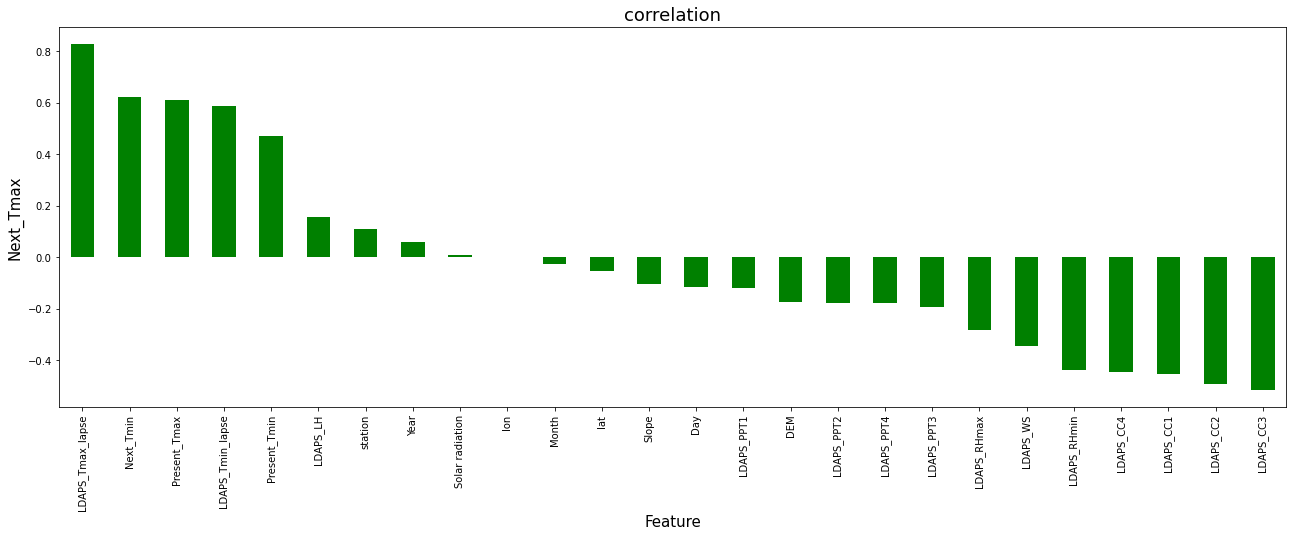

In [419]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending = False).drop(['Next_Tmax']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Next_Tmax', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

## Drop poor correlative columns

In [420]:
#drop lon column
df=df.drop(['lon'], axis=1)

In [421]:
#drop Solar radiation column
df=df.drop(['Solar radiation'], axis=1)

In [473]:
#drop Solar Month column
df=df.drop(['Month'], axis=1)

## Remove outliers 
Now we found the outliers and skewness in some variables.Removing outliers first.

## 1.Outlier removal using Zscore

In [474]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'DEM', 'Slope', 'Next_Tmin', 'Year', 'Day']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df = df[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before and after
shape before         : (7752, 24)
shape after          : (6895, 24)
Percentage Loss      : 0.11055211558307533


11.05% data will loss after applying Zscore technique.

In [475]:
6895/7752 *100

88.94478844169247

88.944% data remains after using Zscore outlier technique.

## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at low side or high side

In [476]:
df2 = df

In [477]:
#features in which outliers are detected
fe = df2[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Day', 'Year']]

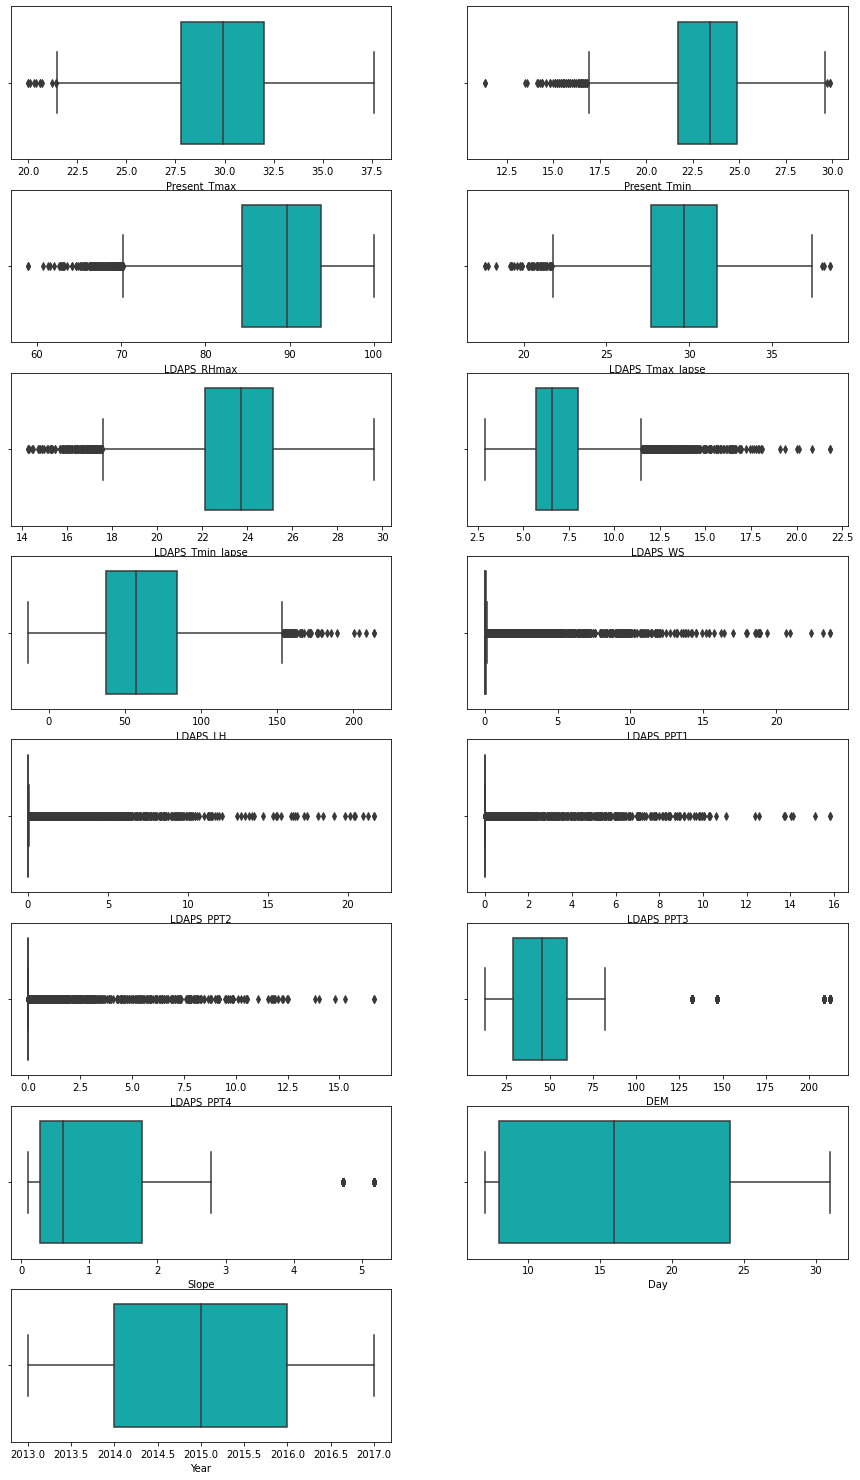

In [478]:
plt.figure(figsize=(15,50))
graph = 1

for column in fe:
    if graph <= 30:
        ax = plt.subplot(15,2, graph)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column, fontsize = 10)
        
    graph+=1
plt.show()

In [479]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = df2.quantile(0.25)

#3rd quantile 75%
q3 = df2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [480]:
df2.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,DEM,Slope,Next_Tmax,Next_Tmin,Year,Day
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,61.867972,1.257048,30.274887,22.932220,2015.000000,16.370968
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,1.754258,1.156174,1.200364,0.050352,54.279780,1.370444,3.122557,2.483276,1.414122,8.240268
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,12.370000,0.098475,17.400000,11.300000,2013.000000,7.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,28.700000,0.271300,28.200000,21.400000,2014.000000,8.000000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,45.716000,0.618000,30.500000,23.100000,2015.000000,16.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.024276,0.009697,0.000693,37.577600,59.832400,1.767800,32.600000,24.600000,2016.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,212.335000,5.178230,38.900000,29.800000,2017.000000,31.000000


## Outlier detection formula 

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR)

##### Outliers removal from lower side 

In [481]:
#Check the Outliers for Length
#Remove outliers from lower side so, use lower side formula

Present_Tmin_out = (q1.Present_Tmin - (1.5*(iqr.Present_Tmin)))
Present_Tmin_out

16.9

In [482]:
index_out = np.where(df2['Present_Tmin'] < Present_Tmin_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,DEM,Slope,Next_Tmax,Next_Tmin,Year,Day
0,0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,212.3350,2.78500,29.1,21.2,2013.0,30.000000
1,1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,44.7624,0.51410,30.5,22.5,2013.0,30.000000
2,2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,33.3068,0.26610,31.1,23.9,2013.0,30.000000
3,3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,45.7160,2.53480,31.7,24.3,2013.0,30.000000
4,4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,35.0380,0.50550,31.2,22.5,2013.0,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7676,7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.000000,0.000000,0.000000,37.5102,21.9668,0.13320,28.0,17.1,2017.0,30.000000
7677,7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,15.5876,0.15540,28.3,18.1,2017.0,30.000000
7678,7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,17.2956,0.22230,28.6,18.8,2017.0,30.000000
7679,7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,19.5844,0.27130,27.8,17.4,2017.0,30.000000


after removing outliers the 7681 rows will remains in dataframe.

In [483]:
#Check the Outliers for Length
#Remove outliers from lower side so, use lower side formula

Present_Tmax_out = (q1.Present_Tmax - (1.5*(iqr.Present_Tmax)))
Present_Tmax_out

21.5

In [484]:
index_out = np.where(df2['Present_Tmax'] < Present_Tmax_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,DEM,Slope,Next_Tmax,Next_Tmin,Year,Day
0,0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,212.3350,2.78500,29.1,21.2,2013.0,30.000000
1,1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,44.7624,0.51410,30.5,22.5,2013.0,30.000000
2,2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,33.3068,0.26610,31.1,23.9,2013.0,30.000000
3,3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,45.7160,2.53480,31.7,24.3,2013.0,30.000000
4,4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,35.0380,0.50550,31.2,22.5,2013.0,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.000000,0.000000,0.000000,37.5102,21.9668,0.13320,28.0,17.1,2017.0,30.000000
7671,7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,15.5876,0.15540,28.3,18.1,2017.0,30.000000
7672,7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,17.2956,0.22230,28.6,18.8,2017.0,30.000000
7673,7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,19.5844,0.27130,27.8,17.4,2017.0,30.000000


after removing outliers the 7675 rows will remains in dataframe. 

In [485]:
#Check the Outliers for Length
#Remove outliers from lower side so, use lower side formula

Present_Tmin_out = (q3.Present_Tmin + (1.5*(iqr.Present_Tmin)))
Present_Tmin_out

29.699999999999996

In [486]:
index_out = np.where(df['Present_Tmin'] > Present_Tmin_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

IndexError: index 7751 is out of bounds for axis 0 with size 7675

In [ ]:
# Diameter is having outliers in lower side so use lower side formula
#Check the Outliers for Present_Tmin
#Remove outliers from lower side so, use lower side formula

LDAPS_RHmax_out = (q1.LDAPS_RHmax - (1.5*(iqr.LDAPS_RHmax)))
LDAPS_RHmax_out

In [ ]:
index_out = np.where(df['LDAPS_RHmax'] < LDAPS_RHmax_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers the 4069 rows will remains in dataframe. 

In [ ]:
# Height is having outliers in lower side so use lower side formula
#Check the Outliers for Height
#Remove outliers from lower side so, use lower side formula

Height_out = (q1.Height - (1.5*(iqr.Height)))
Height_out

In [ ]:
index_out = np.where(df2['Height'] < Height_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

In [ ]:
#as shown in boxplot we have outlier in higher side of height also
#Remove outliers from higher side so, use higher side formula

Height_out = (q3.Height + (1.5*(iqr.Height)))
Height_out

In [ ]:
index_out = np.where(df2['Height'] > Height_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers the 4060 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of whole weightafter removing outliers the 4069 rows will remains in dataframe. 
#Remove outliers from higher side so, use higher side formula

Wholeweight_out = (1.153000 + (1.5*(1.153000-0.441500)))
Wholeweight_out

In [ ]:
index_out = np.where(df['Whole weight'] > Wholeweight_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers in Whole weight the 4030 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of Shucked weight 
#Remove outliers from higher side so, use higher side formula

Shuckedweight_out = (0.253000 + (1.5*(0.253000-0.186000)))
Shuckedweight_out

In [ ]:
df2['Shucked weight']

In [ ]:
index_out = np.where(df2['Shucked weight'] > Shuckedweight_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers in Shucked weight the 2101 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of Viscera weight 
#Remove outliers from higher side so, use higher side formula

Visceraweight_out = (0.502000 + (1.5*(0.502000-0.093500)))
Visceraweight_out

In [ ]:
index_out = np.where(df['Viscera weight'] > Visceraweight_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers in Viscera weight the 2101 rows will remains in dataframe. 

#### After removing outliers using IQR technique there are 2101 rows will remains in dataset.
Now, find how much data loss in IQR method

49.70 % data loss after using IQR technique.

50.30% data remains.

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique 

## Check the skewness and remove that

In [487]:
new_df.skew()

station             0.002840
Present_Tmax       -0.272517
Present_Tmin       -0.227931
LDAPS_RHmin         0.305504
LDAPS_RHmax        -0.688472
LDAPS_Tmax_lapse   -0.110579
LDAPS_Tmin_lapse   -0.385025
LDAPS_WS            1.087368
LDAPS_LH            0.568384
LDAPS_CC1           0.593567
LDAPS_CC2           0.500798
LDAPS_CC3           0.700042
LDAPS_CC4           0.710477
LDAPS_PPT1          3.731539
LDAPS_PPT2          4.844058
LDAPS_PPT3          5.479355
LDAPS_PPT4          5.927388
lat                 0.107956
DEM                 1.763140
Slope               1.592980
Next_Tmax          -0.273347
Next_Tmin          -0.240693
Year                0.010738
Day                 0.254940
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range

1. LDAPS_WS
2. LDAPS_LH
3. LDAPS_CC1
4. LDAPS_CC2
5. LDAPS_CC3
6. LDAPS_CC4
7. LDAPS_PPT1
8. LDAPS_PPT2
9. LDAPS_PPT3
10. LDAPS_PPT4
11. DEM
12. Slope

## Apply yeo-johnson transformation to remove skewness

In power transformation we will take the mean value in place of 0th value skewed data and convert that into normal data(distribution)/less skewed data and .

In [488]:
#applying log transformation on skewed columns
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

new_df['LDAPS_WS'] = scaler.fit_transform(new_df['LDAPS_WS'].values.reshape(-1,1))
new_df['LDAPS_LH'] = scaler.fit_transform(new_df['LDAPS_LH'].values.reshape(-1,1))
new_df['LDAPS_CC1'] = scaler.fit_transform(new_df['LDAPS_CC1'].values.reshape(-1,1))
new_df['LDAPS_CC2'] = scaler.fit_transform(new_df['LDAPS_CC2'].values.reshape(-1,1))
new_df['LDAPS_CC3'] = scaler.fit_transform(new_df['LDAPS_CC3'].values.reshape(-1,1))
new_df['LDAPS_CC4'] = scaler.fit_transform(new_df['LDAPS_CC4'].values.reshape(-1,1))
new_df['LDAPS_PPT1'] = scaler.fit_transform(new_df['LDAPS_PPT1'].values.reshape(-1,1))
new_df['LDAPS_PPT2'] = scaler.fit_transform(new_df['LDAPS_PPT2'].values.reshape(-1,1))
new_df['LDAPS_PPT3'] = scaler.fit_transform(new_df['LDAPS_PPT3'].values.reshape(-1,1))
new_df['LDAPS_PPT4'] = scaler.fit_transform(new_df['LDAPS_PPT4'].values.reshape(-1,1))
new_df['DEM'] = scaler.fit_transform(new_df['DEM'].values.reshape(-1,1))
new_df['Slope'] = scaler.fit_transform(new_df['Slope'].values.reshape(-1,1))

In [489]:
new_df.skew()

station             0.002840
Present_Tmax       -0.272517
Present_Tmin       -0.227931
LDAPS_RHmin         0.305504
LDAPS_RHmax        -0.688472
LDAPS_Tmax_lapse   -0.110579
LDAPS_Tmin_lapse   -0.385025
LDAPS_WS            0.006163
LDAPS_LH           -0.029569
LDAPS_CC1           0.062611
LDAPS_CC2           0.047041
LDAPS_CC3           0.090248
LDAPS_CC4           0.137566
LDAPS_PPT1          1.546024
LDAPS_PPT2          1.736252
LDAPS_PPT3          1.902164
LDAPS_PPT4          2.155652
lat                 0.107956
DEM                 0.038774
Slope               0.233737
Next_Tmax          -0.273347
Next_Tmin          -0.240693
Year                0.010738
Day                 0.254940
dtype: float64

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

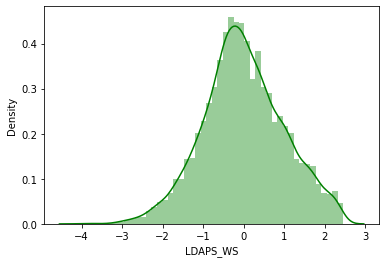

In [490]:
sn.distplot(new_df["LDAPS_WS"], color = 'g')     

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

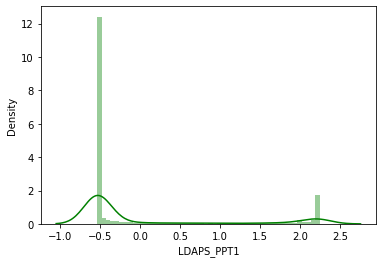

In [491]:
sn.distplot(new_df["LDAPS_PPT1"], color = 'g')     

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

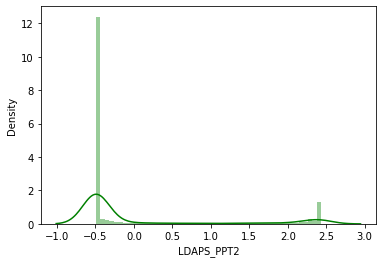

In [492]:
sn.distplot(new_df["LDAPS_PPT2"], color = 'g')     

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

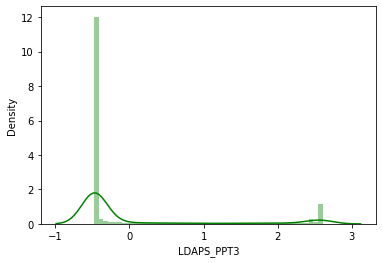

In [493]:
sn.distplot(new_df["LDAPS_PPT3"], color = 'g')     

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

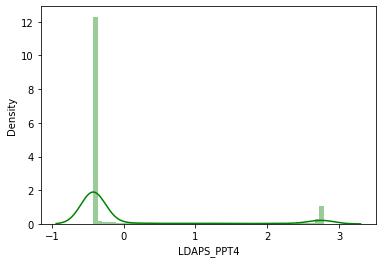

In [494]:
sn.distplot(new_df["LDAPS_PPT4"], color = 'g')     

<AxesSubplot:xlabel='DEM', ylabel='Density'>

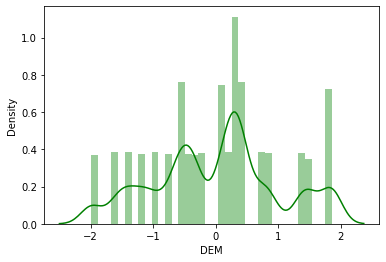

In [495]:
sn.distplot(new_df["DEM"], color = 'g')     

<AxesSubplot:xlabel='Slope', ylabel='Density'>

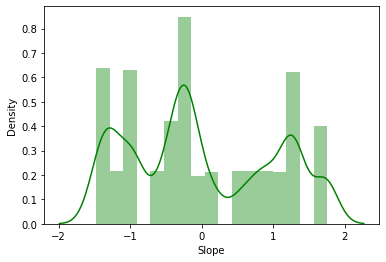

In [496]:
sn.distplot(new_df["Slope"], color = 'g')     

As shown in plot skewness removes after using power transformation skewness removes/reduced.

## Seperating the columns into featuers and target:

#### X= features, y=Target 

In [497]:
x = new_df.drop(columns = 'Next_Tmax', axis=1)
y = new_df['Next_Tmax']

## Scalling technique

In [498]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [499]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.288246,station
1,2.814443,Present_Tmax
2,3.311570,Present_Tmin
3,5.691595,LDAPS_RHmin
4,2.331531,LDAPS_RHmax
5,6.550671,LDAPS_Tmax_lapse
6,8.322400,LDAPS_Tmin_lapse
7,1.191866,LDAPS_WS
8,1.497333,LDAPS_LH
9,4.341201,LDAPS_CC1


as we have saw in the table vif value is greater than 5 for many columns, so drop maximum value column to avoid multiclinearity issue.

In [461]:
new_df=new_df.drop(['LDAPS_Tmin_lapse'], axis=1)

In [462]:
x = new_df.drop(columns = 'Next_Tmax', axis=1)
y = new_df['Next_Tmax']

In [463]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [464]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.288200,station
1,2.677201,Present_Tmax
2,3.209900,Present_Tmin
3,4.486076,LDAPS_RHmin
4,2.296251,LDAPS_RHmax
5,4.149597,LDAPS_Tmax_lapse
6,1.193831,LDAPS_WS
7,1.436862,LDAPS_LH
8,4.195849,LDAPS_CC1
9,5.166633,LDAPS_CC2


In [465]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Finding best random state 

In [500]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.7975900076081076 on Random_state  176


In [501]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 176)

# 1.Linear Regression Model

In [502]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [503]:
pred_test=Lr.predict(x_test)

In [504]:
print(r2_score(y_test,pred_test))

0.7692882602535305


## Cross Validation of Linear Regression 

In [505]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.6742686743688134

## Regularization 

In [506]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [507]:
ls = Lasso(alpha = 0.001, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.7692971535816804

In [508]:
cv_score= cross_val_score(ls, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.674684063753188

###### The r2 score for linear regression model is : 52.50%
###### Cross validation score for linear regression is : 35.26%

# 2.Random Forest Regression 

In [509]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [510]:
Rfr =RandomForestRegressor(criterion = "mse", max_features="log2")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  90.26069733944536
Cross Val Score:  69.31597263788618


###### The r2 score for Random Forest Regressor model is : 53.07%
###### Cross validation score for Random Forest Regressor is : 50.07%

## 3.Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

In [ ]:
pred_dtree = dtree.predict(x_test)
print(r2_score(y_test,pred_dtree))

In [ ]:
cv_score= cross_val_score(dtree, x, y, cv=3)
cv_mean=cv_score.mean()
cv_mean

###### The r2 score for Decision tree regression model is : 14.02%
###### Cross validation score for Decision tree regression is : 25.57% 

## 4.Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

In [ ]:
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))

In [ ]:
cv_score= cross_val_score(svr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

## Compare all models

The diffrence between r2 score and cross validation score of linear regression model is : 17.24%

The diffrence between r2 score and cross validation score Random Forest Regressor model is : 3%

The diffrence between r2 score and cross validation score of Decision Tree Regressor model is : 11.55%

The diffrence between r2 score and cross validation score of SVR model is : 10.32%

### So, best model is Random Forest Regressor.

## Hyper parameter tunning

In [ ]:
#Random forest Classifier

Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['mse', 'mae']}

In [ ]:
GCV=GridSearchCV(RandomForestRegressor(),Parameters,cv=5)

In [ ]:
GCV.fit(x_train, y_train)

In [ ]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

In [ ]:
mod = RandomForestRegressor( criterion='mse', max_depth=7 , max_features='auto', n_estimators=700)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

after hyper parameter tuning rendom forest regressor value is 52.92%

## Saving the model

In [ ]:
import pickle

In [ ]:
#creating binary file first

with open("model_pickle", "wb") as f:
    pickle.dump(Rfrc, f)

In [ ]:
#reading Bbinary file

with open("model_pickle","rb") as f:
    mp=pickle.load(f)

Model saved